In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [5]:
# Load and preprocess data
def load_data():
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    return x_train, x_test

In [6]:
# Downsample images to create low-resolution versions
def downsample_images(images, downscale_factor=2):
    low_res_images = np.array([resize(image, (image.shape[0] // downscale_factor,
                                              image.shape[1] // downscale_factor),
                                      anti_aliasing=True) for image in images])
    return low_res_images

In [7]:
# Simple Super-Resolution Model
def build_super_resolution_model(input_shape):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))

    # Upscaling layers
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

    return model

In [12]:
# Train the model
def train_model(model, x_train_lr, x_train_hr, epochs=10, batch_size=64):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train_lr, x_train_hr, epochs=epochs, batch_size=batch_size)



In [11]:
# Display images
def display_images(low_res_image, high_res_image, predicted_image):
    plt.figure(figsize=(15, 5))
    titles = ['Low Resolution', 'High Resolution', 'Predicted High Resolution']
    images = [low_res_image, high_res_image, predicted_image]

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')

    plt.show()




In [3]:
# Load and prepare data
x_train, x_test = load_data()
x_train_lr = downsample_images(x_train)
x_test_lr = downsample_images(x_test)



In [8]:
# Build and train model
input_shape = (x_train_lr.shape[1], x_train_lr.shape[2], 3)
super_res_model = build_super_resolution_model(input_shape)
train_model(super_res_model, x_train_lr, x_train, epochs=2)  # Limited epochs for demonstration



Epoch 1/2
782/782 [==============================] - 427s 545ms/step - loss: 0.0054
Epoch 2/2
782/782 [==============================] - 435s 556ms/step - loss: 0.0026


In [9]:
# Test the model
index = 0  # Index of the image to be tested
predicted_hr = super_res_model.predict(np.expand_dims(x_test_lr[index], axis=0))[0]



1/1 [==============================] - 0s 101ms/step


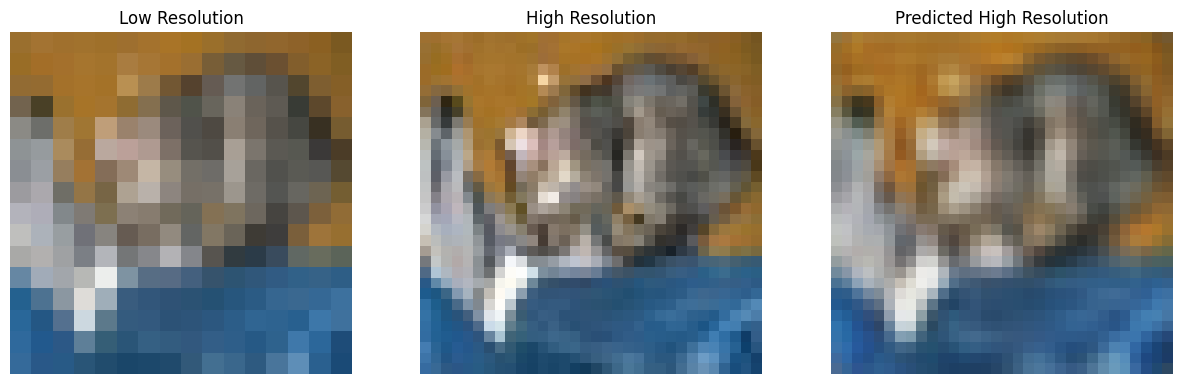

In [10]:
# Display the results
display_images(x_test_lr[index], x_test[index], predicted_hr)

In [13]:
# Image Rescaling Model
def build_image_rescaling_model(input_shape):
    model = models.Sequential()

    # Downscaling layers
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), strides=2, activation='relu', padding='same'))  # Downscale by factor of 2

    # Upscaling layers
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))  # Output layer

    return model

In [14]:
# Train the model
def train_model(model, x_train, epochs=10, batch_size=64):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, x_train, epochs=epochs, batch_size=batch_size)


In [15]:

# Display images
def display_images(original_image, rescaled_image):
    plt.figure(figsize=(10, 4))
    titles = ['Original Image', 'Rescaled Image']
    images = [original_image, rescaled_image]

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')

    plt.show()



In [16]:
# Load and prepare data
x_train, x_test = load_data()



In [17]:
# Build and train model
input_shape = x_train.shape[1:]  # Assuming square images with 3 channels
rescaling_model = build_image_rescaling_model(input_shape)
train_model(rescaling_model, x_train, epochs=2)  # Limited epochs for demonstration



Epoch 1/2
782/782 [==============================] - 214s 272ms/step - loss: 0.0039
Epoch 2/2
782/782 [==============================] - 208s 266ms/step - loss: 0.0011


In [18]:
# Test the model
index = 0  # Index of the image to be tested
rescaled_image = rescaling_model.predict(np.expand_dims(x_test[index], axis=0))[0]



1/1 [==============================] - 0s 71ms/step


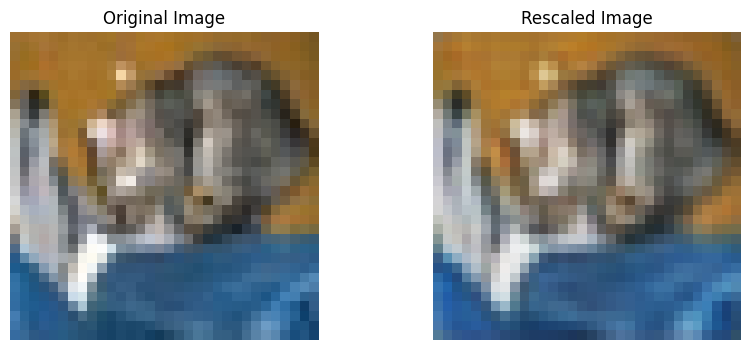

In [19]:
# Display the results
display_images(x_test[index], rescaled_image)